In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical


In [3]:
print(tf.__version__)

2.11.0


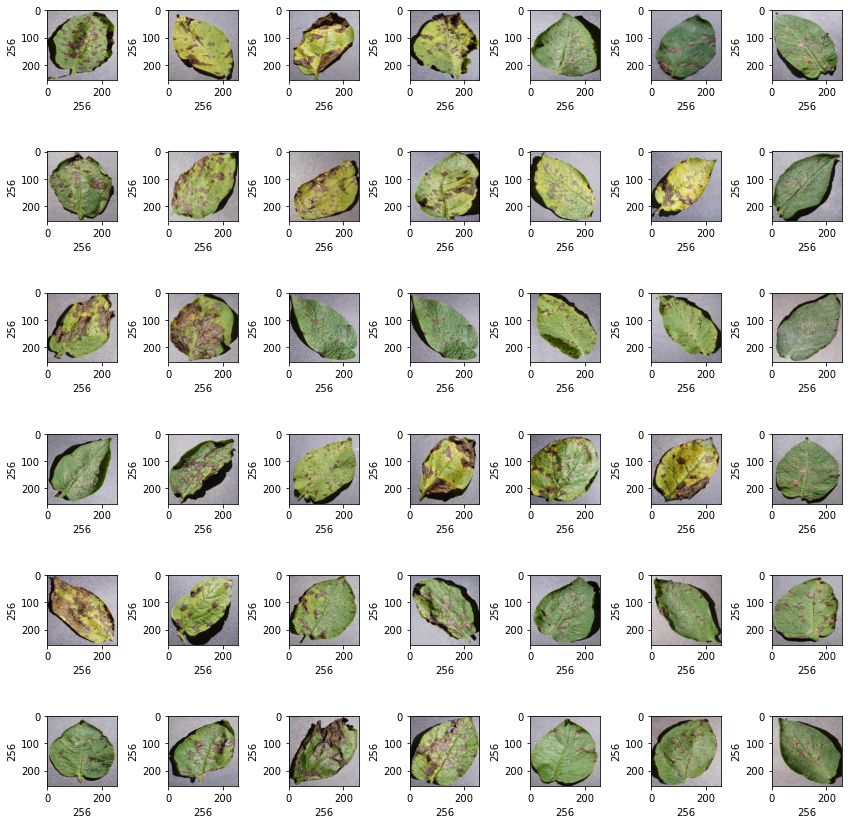

In [4]:
plt.figure(figsize=(12,12))
path = 'c:/Users/prity/OneDrive/Documents/Dataset/Dataset/Potato___Early_blight/'
for i in range(1,43):
    plt.subplot(6,7,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [17]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
    return None

In [18]:
dir = "c:/Users/prity/OneDrive/Documents/Dataset/Dataset"
image_list, label_list = [], []
all_labels = ['Tomato___Bacterial_spot', 'Potato___Early_blight', 'Corn_(maize)___Common_rust_']
binary_labels = [0,1,2]
temp = -1

for directory in ['Tomato___Bacterial_spot', 'Potato___Early_blight', 'Corn_(maize)___Common_rust_']:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

In [19]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [20]:
image_list[0].shape


(256, 256, 3)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [22]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 8)                 9

In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics=['accuracy'])

In [27]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [28]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val,y_val))

Epoch 1/50
5/5 [==============================] - 17s 3s/step - loss: 1.0514 - accuracy: 0.2917 - val_loss: 0.8890 - val_accuracy: 0.3542
Epoch 2/50
5/5 [==============================] - 18s 4s/step - loss: 0.8303 - accuracy: 0.3420 - val_loss: 0.7192 - val_accuracy: 0.5556
Epoch 3/50
5/5 [==============================] - 17s 3s/step - loss: 0.6953 - accuracy: 0.5573 - val_loss: 0.6086 - val_accuracy: 0.6597
Epoch 4/50
5/5 [==============================] - 16s 3s/step - loss: 0.6029 - accuracy: 0.5938 - val_loss: 0.5257 - val_accuracy: 0.6667
Epoch 5/50
5/5 [==============================] - 18s 3s/step - loss: 0.5361 - accuracy: 0.6111 - val_loss: 0.4714 - val_accuracy: 0.6667
Epoch 6/50
5/5 [==============================] - 15s 3s/step - loss: 0.4949 - accuracy: 0.6250 - val_loss: 0.4396 - val_accuracy: 0.6597
Epoch 7/50
5/5 [==============================] - 15s 3s/step - loss: 0.4677 - accuracy: 0.6250 - val_loss: 0.4312 - val_accuracy: 0.6597
Epoch 8/50
5/5 [==================

In [30]:
model.save("c:/Users/prity/OneDrive/Documents/Dataset/Dataset")

INFO:tensorflow:Assets written to: c:/Users/prity/OneDrive/Documents/Dataset/Dataset\assets


INFO:tensorflow:Assets written to: c:/Users/prity/OneDrive/Documents/Dataset/Dataset\assets


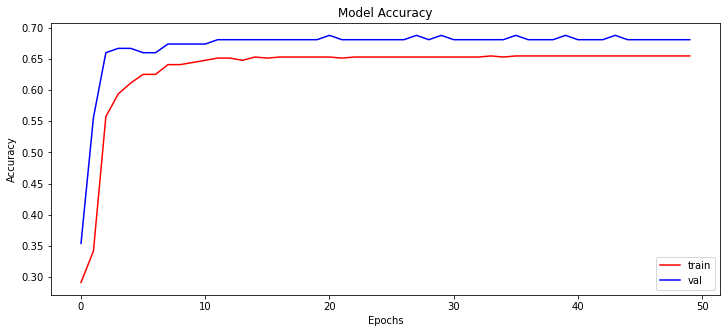

In [34]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [35]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
6/6 [==============================] - 2s 328ms/step - loss: 0.2821 - accuracy: 0.6722
Test Accuracy: 67.22221970558167


In [36]:
y_pred = model.predict(x_test)

6/6 [==============================] - 2s 301ms/step


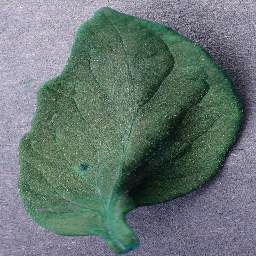

In [37]:
img = array_to_img(x_test[16])
img

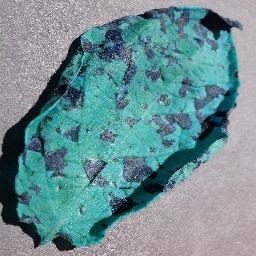

In [38]:
img = array_to_img(x_test[32])
img

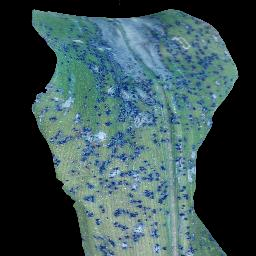

In [39]:
img = array_to_img(x_test[48])
img

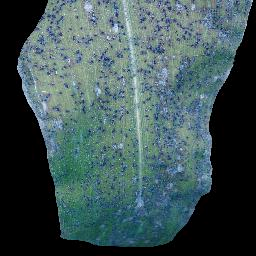

In [40]:
img = array_to_img(x_test[65])
img

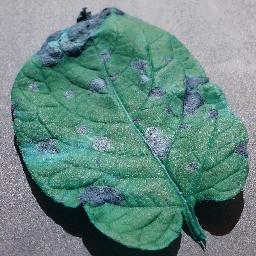

In [41]:
img = array_to_img(x_test[72])
img

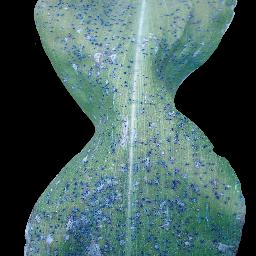

In [42]:
img = array_to_img(x_test[92])
img

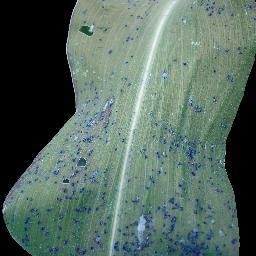

In [43]:
img = array_to_img(x_test[128])
img

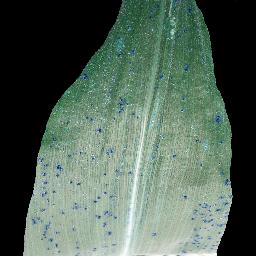

In [44]:
img = array_to_img(x_test[160])
img

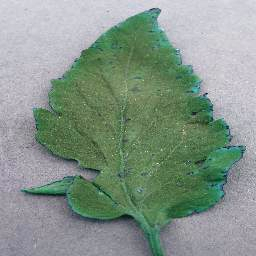

In [47]:
img = array_to_img(x_train[160])
img

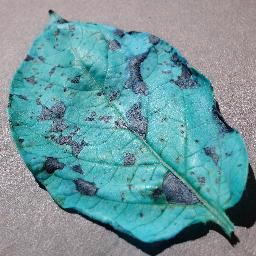

In [48]:
img = array_to_img(x_train[15])
img

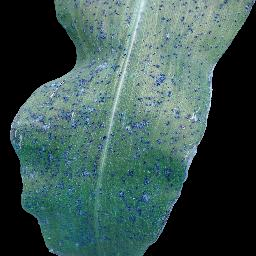

In [49]:
img = array_to_img(x_train[30])
img

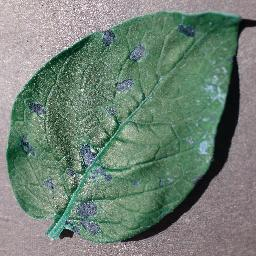

In [50]:
img = array_to_img(x_train[45])
img

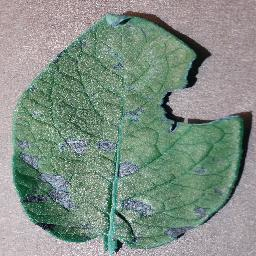

In [51]:
img = array_to_img(x_train[60])
img

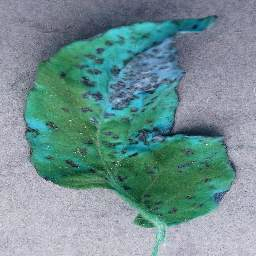

In [52]:
img = array_to_img(x_train[90])
img

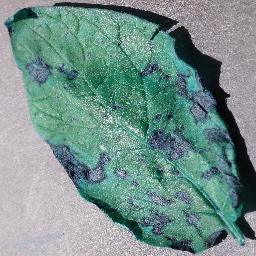

In [53]:
img = array_to_img(x_train[190])
img

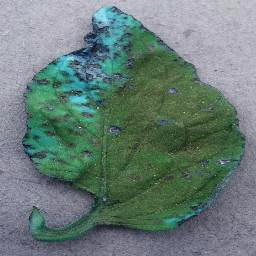

In [54]:
img = array_to_img(x_train[187])
img

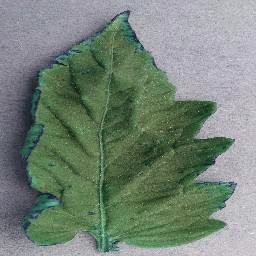

In [55]:
img = array_to_img(x_train[156])
img

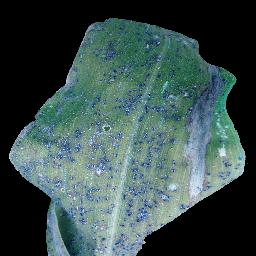

In [56]:
img = array_to_img(x_train[188])
img

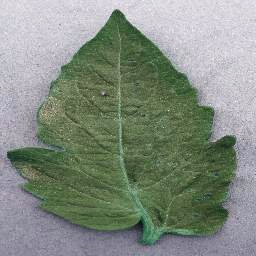

In [59]:
img = array_to_img(x_train[300])
img

In [45]:
print("Original Label: ", all_labels[np.argmax(y_test[11])])
print("Predicted Label: ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Original Label:  Tomato___Bacterial_spot
Predicted Label:  Tomato___Bacterial_spot
[0.04938063 0.49140295 0.45921636]


In [46]:
for i in range(50):
    print(all_labels[np.argmax(y_test[i])], "-", all_labels[np.argmax(y_pred[i])])

Potato___Early_blight - Potato___Early_blight
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Corn_(maize)___Common_rust_ - Potato___Early_blight
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Corn_(maize)___Common_rust_ - Potato___Early_blight
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Potato___Early_blight - Potato___Early_blight
Potato___Early_blight - Potato___Early_blight
Potato___Early_blight - Potato___Early_blight
Potato___Early_blight - Potato___Early_blight
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Corn_(maize)___Common_rust_ - Potato___Early_blight
Corn_(maize)___Common_rust_ - Potato___Early_blight
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Corn_(maize)___Common_rust_ - Potato___Early_blight
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Corn_(maize)___Common_rust_ - Potato___Early_blight
Corn_(maize)___Common_rust_ - Potato___Early_blight
Corn_(

In [ ]:
The end :) Thankyou...:)